# **About Dataset:**
This dataset contains person's information like age, sex, gender, bmi, region, smoke or not, children, and we have to predict the medical insurance cost. 

# **Import libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


%matplotlib inline

# **Import dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('insurance.csv', delimiter=',')
df.head()

Saving insurance.csv to insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Exploratory Data Analysis (EDA)**

In [ ]:
#Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Number of rows and columns in the dataset
df.shape

(1338, 7)

In [ ]:
#Data description of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


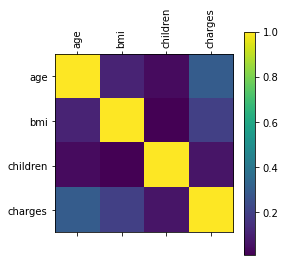

In [ ]:
#Correlation helps identify how strongly two attributes are related to each other
#displaying the correlations 
wcorr = df.corr() 
plt.matshow(wcorr.abs()) 
plt.colorbar() 
plt.xticks(range(len(wcorr.columns)), wcorr.columns, rotation='vertical')
plt.yticks(range(len(wcorr.columns)), wcorr.columns)
#Another way
wcorr.abs().style.background_gradient() 

In [ ]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Look at the data types 
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# **Encoding values**

In [ ]:
#Encoding categorical data values - sex, smoker and non-smoker, region
labelencoder = LabelEncoder()
df.sex= labelencoder.fit_transform(df.sex.values)
df.smoker= labelencoder.fit_transform(df.smoker.values)
df.region= labelencoder.fit_transform(df.region.values)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# **Split the data**

In [ ]:
x = df.drop(['charges','region'], axis = 1)
y = df.charges

#Split the data into 75% training and 25% testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# **Building the models**

**Models: Linear Regression, Decision Trees, Random Forest**

**Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables.**

In [ ]:
#Using Linear Regression
lreg = linear_model.LinearRegression()
lreg.fit(X_train, Y_train)

y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)

print('Linear Regression R^2 score: ', r2_score(Y_test,y_test_pred))
print('Linear Regression Cross validation score: ', cross_val_score(lreg,X_train, Y_train, cv=10).mean())

Linear Regression R^2 score:  0.7952171980481992
Linear Regression Cross validation score:  0.7201882009816054


**Decsion Tree Regressor: It uses a decision tree to go from observations about an item to conclusions about the item's target value.**

In [ ]:
#Using Decision Trees
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,Y_train)

dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

print('Decision Tree R^2 score: ',r2_score(Y_test,dt_test_pred))
print('Decision Tree Cross validation score: ',cross_val_score(dt,X_train, Y_train, cv=10).mean())

Decision Tree R^2 score:  0.7066938232389572
Decision Tree Cross validation score:  0.6505624931708361


**Random Forest Regressor: A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.**

In [ ]:
#Using Random Forest
Rf = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
Rf.fit(X_train,Y_train)

Rf_train_pred = Rf.predict(X_train)
Rf_test_pred = Rf.predict(X_test)

print('Random Forest R^2 score: ',r2_score(Y_test,Rf_test_pred))
print('Random Forest Cross validation score: ',cross_val_score(Rf,X_train, Y_train, cv=10).mean())

Random Forest R^2 score:  0.8681209840318433
Random Forest Cross validation score:  0.7940342092321264


# **Evaluation**

**R^2 score: Coefficient of determination also called as R2 score is used to evaluate the performance. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s)**

**Cross validation score: It takes the features df and target y , splits into k-folds (which is the cv parameter), fits on the (k-1) folds and evaluates on the last fold. It does this k times, which is why we get k values in the output array.**

# **Performance of different models**

**Random Forest gives better score compared to Decision Tree. The averaging makes a Random Forest better than a single Decision Tree hence improves its accuracy and reduces overfitting. A prediction from the Random Forest Regressor is an average of the predictions produced by the trees in the forest.**

**Linear Regression gives better score compared to Decision Tree. When there are large number of features with less data-sets(with low noise), linear regressions outperform Decision trees.**